# SIMPLE LINEAR REGRESSION: TRAFFIC PREDICTION   BASED ON THE MORNING HOURS.

## Problem Overview 
We aim to predict traffic flow (number of vehicles) on **Ngong Road** during morning hours of 4 AM - 10 AM to identify patterns in peak and off-peak traffic. Traffic flow is expected to surge during specific intervals, such as 7 AM to 9 AM, reflecting commuter behavior.  

This prediction can assist in traffic management, commuter planning, and urban infrastructure improvements by providing actionable insights for managing congestion and optimizing road use. The study will develop a **linear regression model** to predict traffic based on time, aiding short-term traffic forecasting and long-term planning.

In [56]:
#importing the neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

## Data
The dataset focuses on predicting vehicle traffic along Ngong Road during morning hours (4 AM to 10 AM).  

- **Hours (Independent Variable)**: Represent distinct time blocks from 4 AM to 10 AM.  
- **Vehicle Count (Dependent Variable)**: Indicates traffic flow, ranging from light traffic at **4 AM (69 vehicles)** to a peak at **8 AM (789 vehicles)**, followed by a decline at **10 AM (213 vehicles)**.  

This analysis helps identify traffic patterns, particularly peak and off-peak hours, to improve traffic management and road planning.

In [57]:
#adding the data
in_ho = np.array([4,5,6,7,8,9,10])
de_ve =np.array([69,111,254,415,789,543,213])

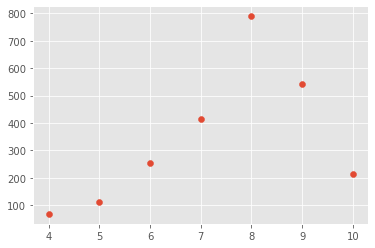

In [58]:
#plotting a scatter plot
plt.scatter(in_ho, de_ve)

conclusion : The relationship between hours and vehicle count is linear but not perfectly linear, indicating a clear trend with increasing traffic during peak hours.

In [59]:
#calculating  the correlaion coefficient
correlation = np.corrcoef(in_ho, de_ve)[0, 1]
print(f"The correlation between number of hours and vehecles is   : {correlation}")

The correlation between number of hours and vehecles is   : 0.5486170457560949


conclusion : the relationship between  hours and  vehecles is moderately positive correlation since .

In [66]:
# calc ulating the function to get the slope (m)
def calc_slope(in_ho, de_ve):
    # calculating the mean of in_ho and de_ve
    mean_in_ho = sum(in_ho) / len(in_ho)
    mean_de_ve = sum(de_ve) / len(de_ve)
    
    # calculating the numerator
    numerator = sum((x - mean_in_ho) * (y - mean_de_ve) for x, y in zip(in_ho, de_ve))
    
    # calulating the denominator
    denominator = sum((x - mean_in_ho)**2 for x in in_ho)
    
    # calulating the slope
    m = numerator / denominator
    return m

m = calc_slope(in_ho, de_ve)
print(f"The slope(m) is: {m}")


The slope(m) is: 65.39285714285714


In [61]:
def calc_intercept(m, in_ho, de_ve):
    # calculating the mean of in_ho and de_ve
    mean_in_ho = sum(in_ho) / len(in_ho)
    mean_de_ve = sum(de_ve) / len(de_ve)
    
    # Intercept formula: c = mean_y - m * mean_x
    c = mean_de_ve - (m * mean_in_ho)
    return c
c  = calc_intercept(m, in_ho, de_ve)
print("The y-intercept (c) is:", c)

The y-intercept (c) is: -115.75


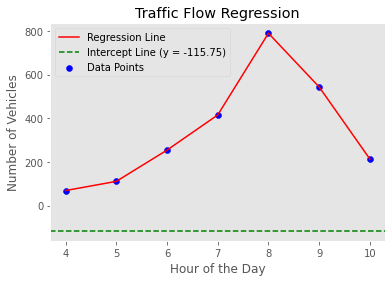

In [62]:
# Plotting
plt.scatter(in_ho, de_ve, color='blue', label='Data Points')  # Scatter plot for data points
plt.plot(in_ho, de_ve, color='red', label='Regression Line')  # Regression line
plt.axhline(y=c, xmin=0, xmax=1.2, color='green', linestyle='--', label=f'Intercept Line (y = {c:.2f})')

# Adding labels and legend
plt.title('Traffic Flow Regression')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.grid()

# Display plot
plt.show()

##  Predicting  the number of vehecles at 12  noon.
Now that we have a working regression model with m and c parameters , we can try to fin d out how heavy the traffic will be at 12 noon 

In [63]:
# Function to calculate the prediction
def predict(x, m, c):
    y = (m * x) + c
    return y

# seeing  how the  traffic will behave  at 12 noon
new_in_ho = 12 
predicted_y = predict(new_in_ho, m, c)  # Using slope (m) and adjusted intercept (c)
print(f"The prediction for traffic at = {new_in_ho} noon is y = {predicted_y}")

The prediction for traffic at = 12 noon is y = 668.9642857142857


## line of best fit  using  ordinary least  squares

In [64]:
#creating x  and y variables for the line of best fit
x_line = np.linspace(min(in_ho), max(in_ho), 100)  # Generate x-values
y_line = m * x_line + c  # Generate corresponding y-values using the line equation

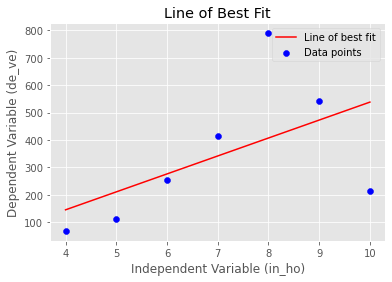

In [65]:
# plotting the line of best fit
plt.scatter(in_ho, de_ve, color="blue", label="Data points")  # Plot original data
plt.plot(x_line, y_line, color="red", label="Line of best fit")  # Plot line of best fit
plt.xlabel("Independent Variable (in_ho)")
plt.ylabel("Dependent Variable (de_ve)")
plt.legend()
plt.title("Line of Best Fit")
plt.show()

The line of best fit closely follows the data points, indicating that the model effectively represents the relationship between traffic flow and time of day along Ngong rd during the morning hours. This suggests that the model captures the general pattern of traffic during both peak and off-peak hours (from 4 AM to 10 AM).  

The positive correlation seen in the data, especially around the 8 AM peak, indicates that the model can accurately predict traffic flow during rush hour periods. Additionally, the decrease in traffic after the peak reflects real-world changes in commuter behavior, which the model handles well. 

THE END